Роман_Одобеску  
Kaggle score = 0.84862

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

# Первая часть. Исследование.

## Загрузка данных (2 балла)
1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5149,26,60.70,1597.4,Female,1,Yes,No,Yes,No,DSL,No,No,Yes,No,No,Yes,One year,No,Mailed check,0
4363,17,83.55,1329.15,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
3142,60,99.00,6017.9,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
3739,29,19.55,521.8,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
1928,19,90.60,1660,Male,1,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1
2011,2,96.00,174.8,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
5186,56,65.20,3512.15,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,No,No,No,Yes,No,One year,No,Bank transfer (automatic),0
5241,20,79.15,1520.9,Female,1,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2788,1,84.50,84.5,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,1
4546,14,92.90,1337.45,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0


In [5]:
data.info() # видим, что nan-ов нет, но TotalSpent имеет тип object. Приведем его к float, т.к. он в num_cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors ='coerce') # преобразуем string к float

In [7]:
#Посмотрим в каких колонках есть пропуски и сколько их. В колонке TotalSpent 9 пропусков.
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [8]:
#Посмотрим на строки со значением Nan в колонке TotalSpent.
#Из колонки ClientPeriod видно, что данные клиенты только начали пользоваться телевидением, следовательно, общие затраты(TotalSpent) равны 0.
data[data.TotalSpent.isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [9]:
data['TotalSpent'].fillna(0, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Таким образом, NaN значений у нас нет ни в одном столбце, все столбцы заполнены

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Гистограммы для численных признаков:

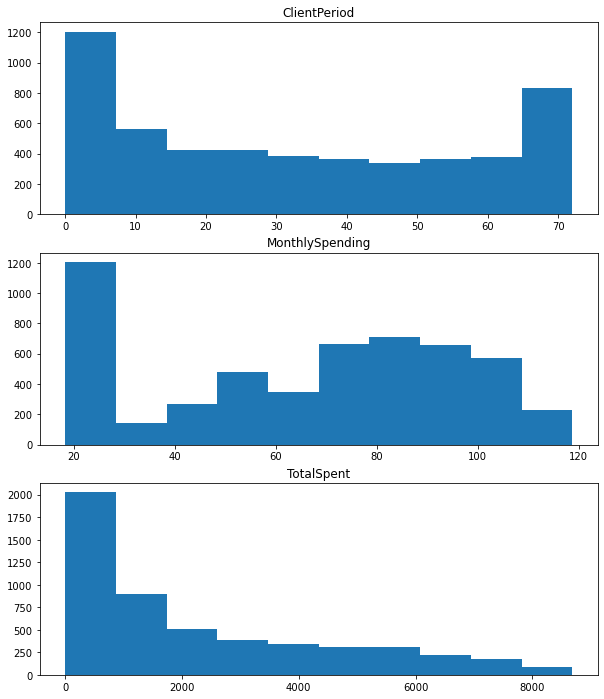

In [11]:
# YOUR CODE
fig, ax = plt.subplots(
    nrows=3, ncols=1,
    figsize=(10, 12)
)

for i in range(len(num_cols)):
    ax[i].hist(data[num_cols[i]])
    ax[i].set_title(num_cols[i])

### Круговые диаграммы для категориальных:

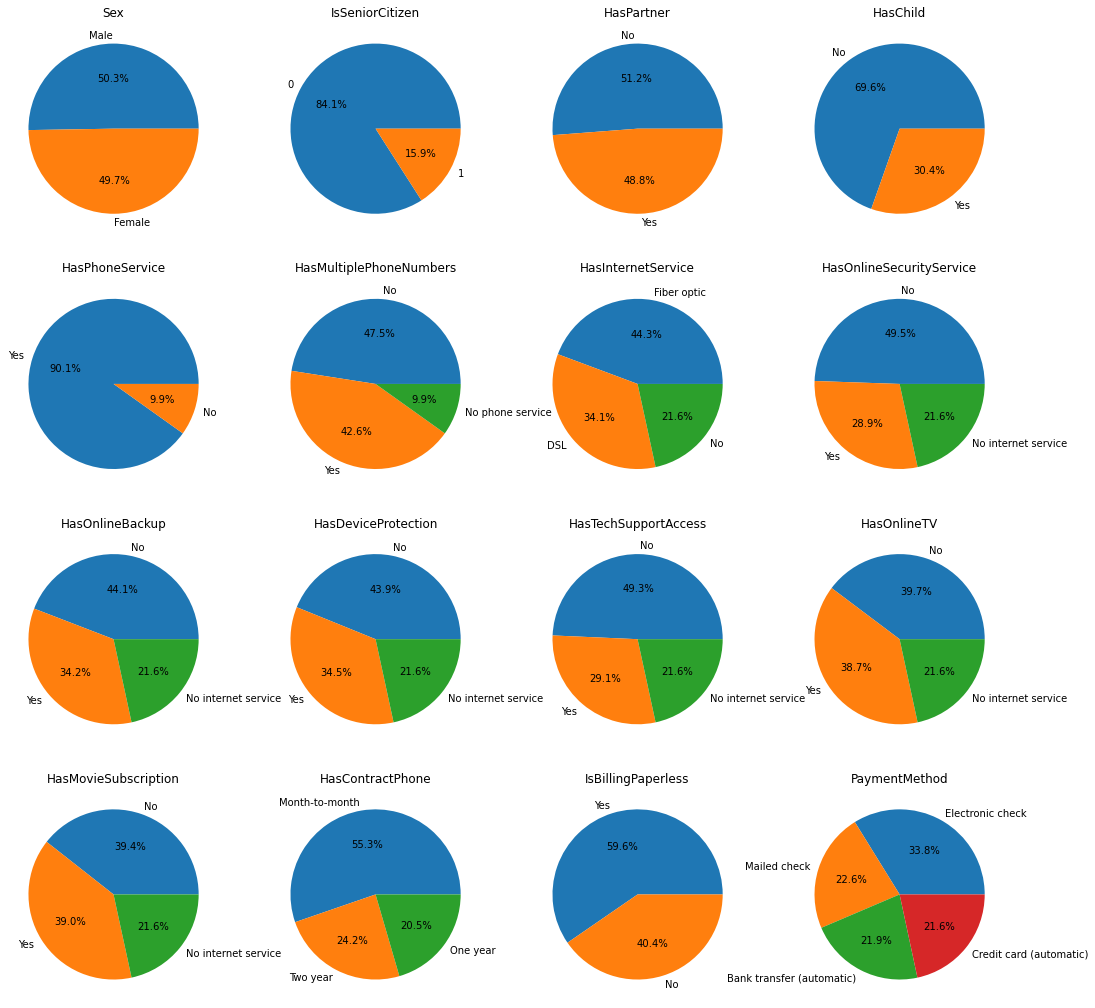

In [12]:
fig, ax = plt.subplots(
    nrows=4, ncols=4,
    figsize=(18, 18)
)


for i in range(len(cat_cols)):
  ax[i//4,i%4].pie(data[cat_cols[i]].value_counts().values, labels = data[cat_cols[i]].value_counts().index, autopct='%1.1f%%')
  ax[i//4,i%4].set_title(cat_cols[i])

### Распределение целевой переменной

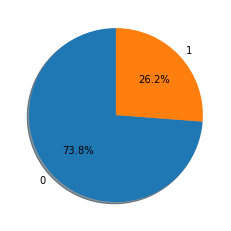

0    3898
1    1384
Name: Churn, dtype: int64


In [13]:
#Посотрим на распределение целевой переменной.
#Классы не сбаласированы, преобладает класс 0.
plt.pie(data[target_col].value_counts(), labels=data[target_col].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
print(data[target_col].value_counts())

In [14]:
(data['Churn'] < 0.5).sum() / (data['Churn'] >= 0.5).sum()

2.816473988439306

### Таким образом, датасет несбалансиован, но не сильно (1 клиент уйдёт, ~2.8 останутся)
(хотя accuracy уже некорректно использовать)

### В seaborn графики выглядят приятнее

<AxesSubplot:>

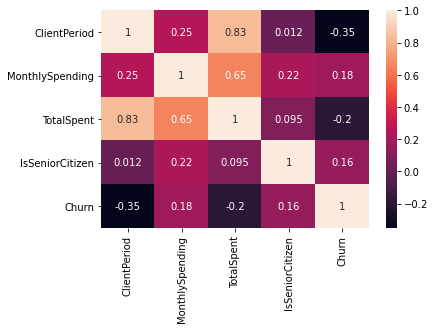

In [16]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


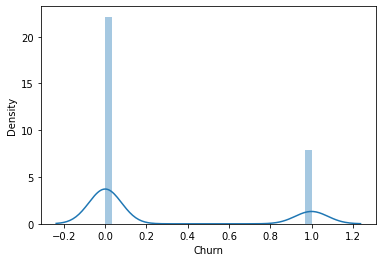

In [17]:
sns.distplot(a=data['Churn'],
            bins=30,
            kde=True);

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


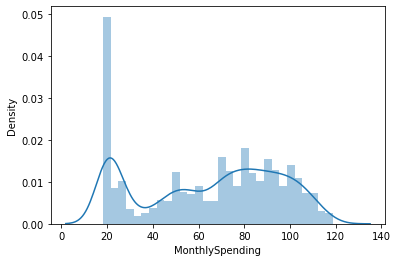

In [18]:
import seaborn as sns
sns.distplot(a=data['MonthlySpending'],
            bins=30,
            kde=True);

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

### Сами реализуем нормализацию, чтобы укрепить понимание

In [19]:
copy_data = data.copy()
for num_feature in num_cols:
  max_value = data[num_feature].max()
  min_value = data[num_feature].min()
  copy_data[num_feature] = (data[num_feature] - min_value) / (max_value - min_value)

In [20]:
copy_data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0.763889,0.012438,0.118178,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,1.000000,0.075622,0.215572,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,0.013889,0.573632,0.008739,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,0.444444,0.607463,0.295919,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,0.833333,0.965174,0.778193,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.041667,0.120896,0.009459,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,0.694444,0.260697,0.251986,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,0.013889,0.366169,0.006339,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,0.402778,0.574627,0.255072,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


### Вместо использования комбинации LabelEncoder + OneHotEncoder можно воспользоваться pandas.get_dummies()  
### В качестве бонуса - получаем нормальные имена столбцов, а не числа в случае вышеописанной комбинации, в остальном результат аналогичен

In [21]:
copy_data = pd.get_dummies(copy_data, columns=cat_cols)

In [22]:
copy_data

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.763889,0.012438,0.118178,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.000000,0.075622,0.215572,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,0.013889,0.573632,0.008739,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0.444444,0.607463,0.295919,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,0.833333,0.965174,0.778193,0,1,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.041667,0.120896,0.009459,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5278,0.694444,0.260697,0.251986,0,0,1,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
5279,0.013889,0.366169,0.006339,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5280,0.402778,0.574627,0.255072,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


### Использование LabelEncoder + OneHotEncoder (data_out далее не используется)

In [23]:
categorical_cols = cat_cols

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

array_hot_encoded = ohe.fit_transform(data[categorical_cols]).toarray()

data_hot_encoded = pd.DataFrame(array_hot_encoded, index=data.index)

data_other_cols = data.drop(columns=categorical_cols)

data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [24]:
data_hot_encoded

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5278,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5279,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5280,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [25]:
data_out

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,ClientPeriod,MonthlySpending,TotalSpent,Churn
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,55,19.50,1026.35,0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,72,25.85,1872.20,0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,75.90,75.90,1
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,32,79.30,2570.00,0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,60,115.25,6758.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,3,30.40,82.15,0
5278,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,50,44.45,2188.45,0
5279,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,55.05,55.05,0
5280,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,29,76.00,2215.25,0


## Линейная модель: LogisticRegressionCV

### Разбиваем на тренировочную и валидационную выборки

In [26]:
from sklearn.model_selection import train_test_split

X = copy_data.drop(columns = target_col)
y = copy_data[target_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучаем модель и смотрим результаты на трейне и валидации

In [27]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
    Cs=list(np.power(10.0, np.arange(-3, 3)))
    ,penalty='l2'
    ,scoring='roc_auc'
    ,random_state=777
    ,max_iter=10000
    ,fit_intercept=True
    ,solver='newton-cg'
    ,refit = True
)
searchCV.fit(X_train, y_train)

print(searchCV.coef_) # коэффициенты для лучшей модели
print(searchCV.intercept_) # bias

print(searchCV.score(X_train, y_train))
print(searchCV.score(X_val, y_val))

[[-4.36403322 -9.08405228  2.79498574  0.01794447 -0.01769044 -0.14084751
   0.14110155 -0.01788537  0.01813941  0.08106653 -0.08081249 -0.50374598
   0.50400002 -0.14516713 -0.50374598  0.64916714 -1.16120262  1.73893074
  -0.57747409  0.27040105 -0.57747409  0.30732708  0.15098825 -0.57747409
   0.42673988  0.09867902 -0.57747409  0.4790491   0.26052399 -0.57747409
   0.31720413 -0.22080646 -0.57747409  0.79853459 -0.25898784 -0.57747409
   0.83671596  0.70612275  0.0433636  -0.74923231 -0.19816037  0.1984144
  -0.03002614 -0.1856354   0.28557083 -0.06965526]]
[2.03899313]
0.8538026283520417
0.8271949834227611


Результаты валидации нас не устраивают

## Градиентный бустинг (CatBoost)

### Аналогично разбиваем данные на train и val, но уже не нормированные и без one-hot-encoding

In [28]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3,0
1,72,25.85,1872.20,1,0,1,0,1,2,2,1,1,1,1,1,1,2,0,1,0
2,1,75.90,75.90,1,0,0,0,1,0,1,0,0,0,2,0,0,0,1,2,1
3,32,79.30,2570.00,0,1,1,0,1,2,1,0,0,2,0,0,0,0,0,3,0
4,60,115.25,6758.45,0,0,1,1,1,2,1,2,2,2,2,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,1,0,0,0,0,2,0,0,0,0,2,0
5278,50,44.45,2188.45,1,0,1,0,0,1,0,2,0,0,2,2,0,1,1,0,0
5279,1,55.05,55.05,1,0,0,0,1,0,0,0,0,2,2,0,0,0,0,3,0
5280,29,76.00,2215.25,0,0,0,0,1,2,1,0,0,0,0,0,0,0,1,1,0


In [29]:
X = data.drop(columns = target_col)
y = data[target_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

В выводе ячейки ниже пишется logloss, график будет виден только если перезапустить эту ячейку (около 30 мин - 1ч), на нем есть roc auc для всех перебираемых параметров

In [28]:
X = data.drop(columns = target_col)
y = data[target_col]


from catboost import CatBoostClassifier, Pool

grid = {'depth': [3, 4, 5],
        'min_data_in_leaf': [6, 8],
        'learning_rate': [0.05, 0.03, 0.01],
        'grow_policy' : ['Lossguide', 'Depthwise'],
        'auto_class_weights' : ['SqrtBalanced', 'Balanced']
       }

pool = Pool(X, y, cat_features = cat_cols)
cat = CatBoostClassifier(cat_features=cat_cols, task_type='GPU', random_seed=1, custom_metric='AUC:hints=skip_train~false', 
                        n_estimators = 300)

grid_search_result = cat.grid_search(grid, X=pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6693953	test: 0.6680723	best: 0.6680723 (0)	total: 29.7ms	remaining: 8.87s
1:	learn: 0.6501886	test: 0.6465857	best: 0.6465857 (1)	total: 60.2ms	remaining: 8.97s
2:	learn: 0.6302004	test: 0.6248492	best: 0.6248492 (2)	total: 88.3ms	remaining: 8.74s
3:	learn: 0.6130678	test: 0.6059983	best: 0.6059983 (3)	total: 120ms	remaining: 8.88s
4:	learn: 0.5978295	test: 0.5892952	best: 0.5892952 (4)	total: 149ms	remaining: 8.79s
5:	learn: 0.5856875	test: 0.5755389	best: 0.5755389 (5)	total: 178ms	remaining: 8.72s
6:	learn: 0.5735193	test: 0.5622269	best: 0.5622269 (6)	total: 206ms	remaining: 8.63s
7:	learn: 0.5641601	test: 0.5516368	best: 0.5516368 (7)	total: 233ms	remaining: 8.5s
8:	learn: 0.5554172	test: 0.5417753	best: 0.5417753 (8)	total: 261ms	remaining: 8.43s
9:	learn: 0.5483891	test: 0.5333784	best: 0.5333784 (9)	total: 291ms	remaining: 8.43s
10:	learn: 0.5412642	test: 0.5259895	best: 0.5259895 (10)	total: 320ms	remaining: 8.41s
11:	learn: 0.5358920	test: 0.5197520	best: 0.51975

In [29]:
grid_search_result # после всех кросс валидаций получаем параметры (лучшая модель по logloss) и результаты cv ниже и обученную модель в cat

{'params': {'min_data_in_leaf': 8,
  'depth': 3,
  'learning_rate': 0.03,
  'grow_policy': 'Lossguide',
  'auto_class_weights': 'SqrtBalanced'},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
 

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, cat.predict_proba(X_valid)[:,1])

0.8505901312326263

## Делаем предсказания, перед этим проделав с X_test все подготовительные действия аналогично обучающей выборке

In [32]:
X_test = pd.read_csv('../data/test.csv')

X_test['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors ='coerce')
X_test['TotalSpent'].fillna(0, inplace = True)

X_test[cat_cols] = X_test[cat_cols].apply(lambda col: le.fit_transform(col))

In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   int32  
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   int32  
 6   HasChild                  1761 non-null   int32  
 7   HasPhoneService           1761 non-null   int32  
 8   HasMultiplePhoneNumbers   1761 non-null   int32  
 9   HasInternetService        1761 non-null   int32  
 10  HasOnlineSecurityService  1761 non-null   int32  
 11  HasOnlineBackup           1761 non-null   int32  
 12  HasDeviceProtection       1761 non-null   int32  
 13  HasTechSupportAccess      1761 non-null   int32  
 14  HasOnlin

In [34]:
X_test

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,1026.35,1,0,1,0,1,2,0,2,0,0,0,0,0,1,0,1
1,29,98.50,1872.20,1,1,1,0,1,2,1,0,0,2,0,2,2,0,1,2
2,9,76.25,75.90,1,0,0,0,1,2,1,0,0,0,0,0,0,0,1,2
3,67,74.00,2570.00,0,0,1,1,1,2,0,2,2,0,2,2,0,2,0,1
4,71,20.10,6758.45,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7723.70,0,0,1,0,1,2,1,0,2,2,0,2,2,2,1,0
1757,13,20.85,3488.15,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,3
1758,2,91.45,875.35,1,0,1,0,1,2,1,0,0,2,0,2,0,0,1,2
1759,19,89.10,212.30,0,0,1,0,1,2,1,0,2,0,0,0,2,0,1,2


In [39]:
best_model = cat

submission = pd.read_csv('../data/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('../data/my_submission.csv', index = False)

In [37]:
data['Churn'].mean()

0.26202196137826583

In [38]:
submission['Churn'].mean()

0.32199146409081514

Возможно, наша модель ставит слишком завышенную оценку churn

# Что ещё можно сделать?

<ul type="circle">
    <li>Попробовать откластеризовать данные, номер кластера в качестве признака добавить к данным</li>
    <li>Попробовать стекинг: сделать композицию из моделей градиентного бустинга, решающих деревьев, случайных лесов и др</li>
    <li>Попробовать другие алгоритмы, мб вместо стекинга сделать нейронку, которой на вход подавать результаты других алгоритмов (например, в качестве ответа получать либо Churn, либо вес для кадого из поданых на вход ответов других алгоритмов)</li>
    <li>Найти выбросы (например с Isolation Forest), отдельно их обрабатывать другой моделью</li>
    <li>Еще что-то сделать с данными (сгенерировать фичи, убрать лишние чем-то вроде pca)</li>
    <li>Аккуратнее работать с несбалансированным датасетом (посмотреть другие метрики, мб немного сэмплировать данные)</li>
    <li>Хотелось бы каким-то образом всё-таки иметь примерно одинаковое среднее значение ( а в идеале ещё медианное значение и дисперсию) у Churn в обучающей выборке и в предсказаниях модели</li>
</ul>